In [1]:
import torch
from torchvision import datasets, transforms
import torch.nn as nn
import torch.nn.functional as F
from tqdm import trange
import numpy as np
import PIL
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload

%autoreload 2

In [3]:
from model.model import UNet, Conv1x1, GaussNet, ProbUNet
import visualization_utils
from training import get_id_to_train_id

In [4]:
num_classes = 19
batch_size = 4

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
data_root = "/home/glazkova/ProbabilisticUnet/data"
id_to_train_id = get_id_to_train_id()

img_transform_func = transforms.Compose([
                    transforms.Resize((256, 512), interpolation = PIL.Image.BILINEAR),
                    transforms.ToTensor(),

                ])

labels_transform_func = transforms.Compose([
                    transforms.Resize((256, 512), interpolation = PIL.Image.NEAREST),
                    transforms.Lambda(lambda x: id_to_train_id[x]),
                    transforms.ToTensor()
                    #transforms.Lambda(lambda x: x*255) #better way?

                ])

train_dataset = datasets.Cityscapes(root=data_root, 
                           mode="fine",
                           split="train",
                           target_type="semantic",
                           transform = img_transform_func,
                           target_transform = labels_transform_func)

test_dataset = datasets.Cityscapes(root=data_root, 
                           mode="fine",
                           split="val",
                           target_type="semantic",
                           transform = img_transform_func,
                           target_transform = labels_transform_func)


train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size)

In [5]:
train_dataset

Dataset Cityscapes
    Number of datapoints: 2975
    Split: train
    Mode: gtFine
    Type: ['semantic']
    Root Location: /home/glazkova/ProbabilisticUnet/data
    Transforms (if any): Compose(
                             Resize(size=(256, 512), interpolation=PIL.Image.BILINEAR)
                             ToTensor()
                         )
    Target Transforms (if any): Compose(
                                    Resize(size=(256, 512), interpolation=PIL.Image.NEAREST)
                                    Lambda()
                                    ToTensor()
                                )

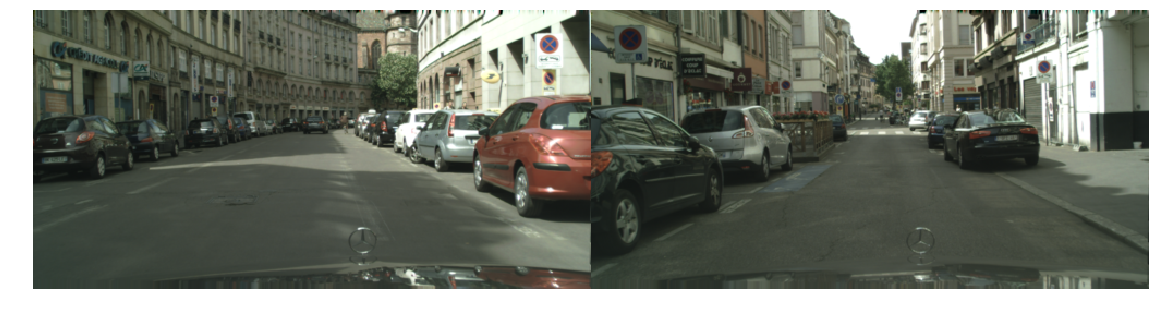

In [6]:
visualization_utils.show_dataset_random_examples(train_dataset, 2)

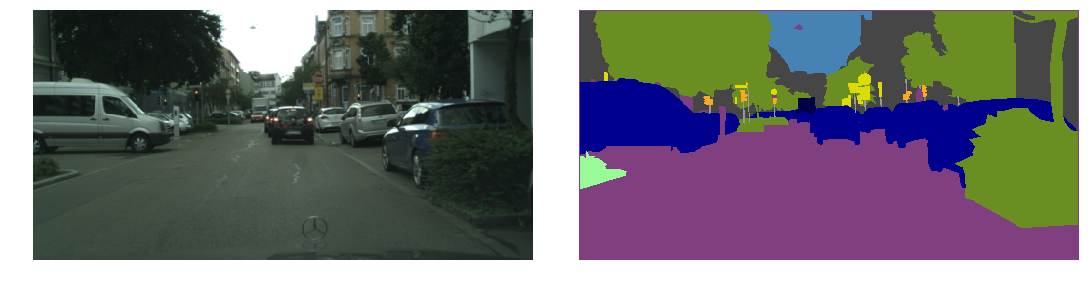

In [7]:
visualization_utils.show_item(train_dataset, 345)